In [208]:
###1.1. Создайте питоновский ноутбук и импортните csv файл.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import ttest_ind
df = pd.read_csv('D:\lessons\Dataset_AB_TEST.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [209]:
###Проведите очистку данных от нуллов и выбросов (используйте функцию statistical_analysis).
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


Среднее = 3568.7580258302582

Дисперсия = 8568932.941996625

Стандартное отклонение = 2927.27397795229

Медиана = 3173.5

Квантили = [ 410.   1250.75 1590.   2329.6  3173.5  3934.   5356.5  7088.2 ]
Межквантильный размах = 4105.75

Децили = [410.0, 872.2, 1590.0, 2329.4, 3173.5, 3934.0, 4810.0, 5967.0, 7089.8]



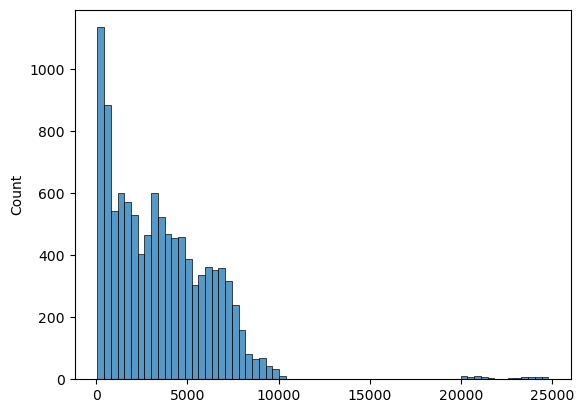

In [210]:
#Избавимся от выбросов.
def statistical_analysis(df, q=[0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.75, 0.9]):
    if type(df) is list or type(df) is tuple:
        if len(df) > 4:
            df = pd.Series(df)
            q1 = np.quantile(df,0.25)
            q3 = np.quantile(df,0.75)
            print(f'Среднее = {df.mean()}\n\nДисперсия = {df.var()}\n\nСтандартное отклонение = {df.std()}\n')
            print(f'Медиана = {st.median(df)}\n\nКвантили = {np.quantile(df,q)}')
            print(f'Межквантильный размах = {(q3-q1)}\n\nДецили = {st.quantiles(df, n=10)}\n')
            plt.show(f'Гистограмма распределения:\n{sns.histplot(data=df)}')
        else:
            return 'Требуется более длинный ряд'
    else:
        return 'Нужен список или кортеж!'
statistical_analysis(list(df['sum_pay']))

In [231]:
#Отрезаем хвост (более 20000)
df = df.loc[df.sum_pay< 20000]

Среднее = 3431.3779388532666

Дисперсия = 6023895.900736336

Стандартное отклонение = 2454.3626261692334

Медиана = 3155.0

Квантили = [ 409. 1237. 1576. 2307. 3155. 3899. 5274. 7011.]
Межквантильный размах = 4037.0

Децили = [408.2, 863.0, 1575.6, 2306.2, 3155.0, 3899.0, 4769.4, 5880.6, 7011.0]



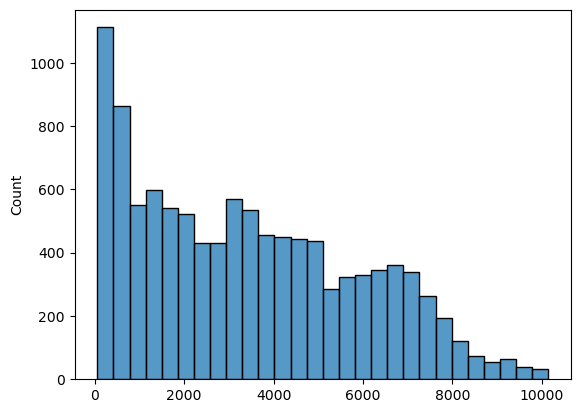

In [232]:
statistical_analysis(list(df['sum_pay']))

In [245]:
###Проведите визуализацию с помощью гистограммы для сравнения результатов в А и Б группе (имеет смысл создать отдельную функцию для визуализации show_hist).
#def show_hist(x):
    #test = x.loc[x.id_group == 'test']
    #test = test['sum_pay']
    #control = x.loc[x.id_group == 'control']
    #control = control['sum_pay']
    #sns.histplot(x=test)
    #sns.histplot(x=control, color = 'red')
    #plt.show()
#show_hist(df)
def show_hist (test, control):
    sns.histplot(data=test)
    sns.histplot(data=control, color = 'red')
    plt.show()

In [ ]:
###Вывод: На графике видно что сумма оплат в тестовой базе выше.

In [234]:
test = df.loc[df.id_group == 'test']
test = test['sum_pay']
control = df.loc[df.id_group == 'control']
control = control['sum_pay']

In [235]:
def mann_whitney_func (set1, set2, a=0.05):
    kMW, pMW = mannwhitneyu(set1, set2, alternative = 'two-sided')
    if pMW > a:
        print('Распределения равны.')
    else: print('Распределения не равны')
    return kMW, pMW

In [236]:
def test_calc (r1, r2, alpha = 0.05):
    s,p = ttest_ind(r1, r2)
    if alpha < p:
        print("Гипотеза НО о равенстве средних принимается")
    else:
        print("Гипотеза НО о равенстве средних отвергается")
    return s,p

In [237]:
mann_whitney_func (test, control)

Распределения равны.


(14750609.5, 0.05842125879702285)

In [188]:
###Вывод: Распределения равны и нет особых изменений в данных.

In [238]:
test_calc (test, control)

Гипотеза НО о равенстве средних отвергается


(3.7141912292177888, 0.0002048855494553075)

In [ ]:
###Вывод: Нулевая гипотиза отвергается, следовательно статистически значимые различия существуют.

In [ ]:
### 2 часть. Анализ по торговым точкам

In [239]:
un = df.id_point.unique()
un

array([1199., 1182., 1178., 1179., 1186., 1188.])

1199.0


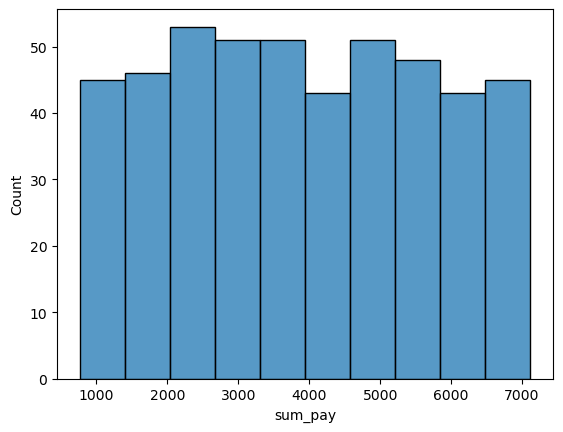

Не достаточно данных!
1182.0


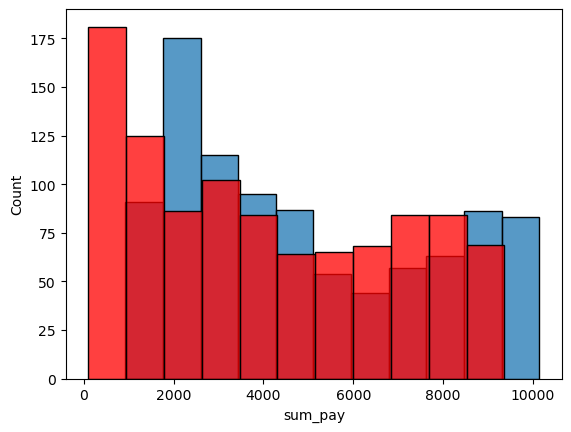

Распределения не равны
Гипотеза НО о равенстве средних отвергается
1178.0


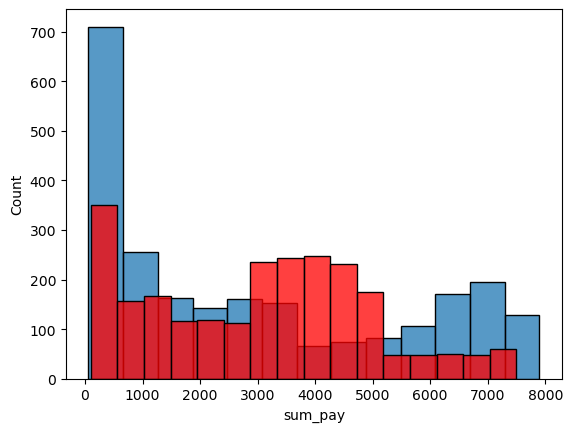

Распределения не равны
Гипотеза НО о равенстве средних принимается
1179.0


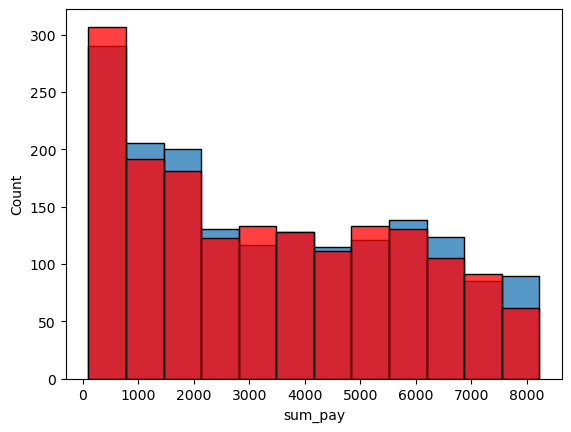

Распределения равны.
Гипотеза НО о равенстве средних принимается
1186.0


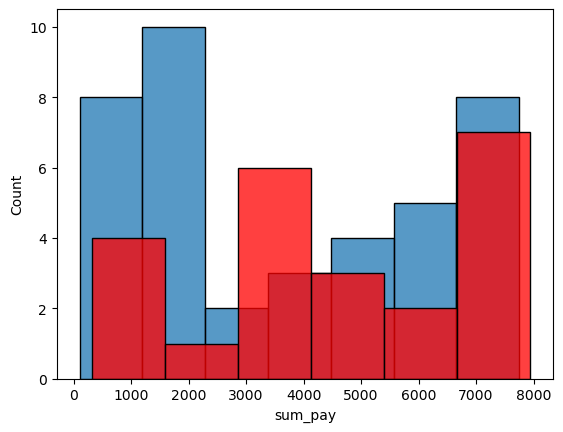

Не достаточно данных!
1188.0


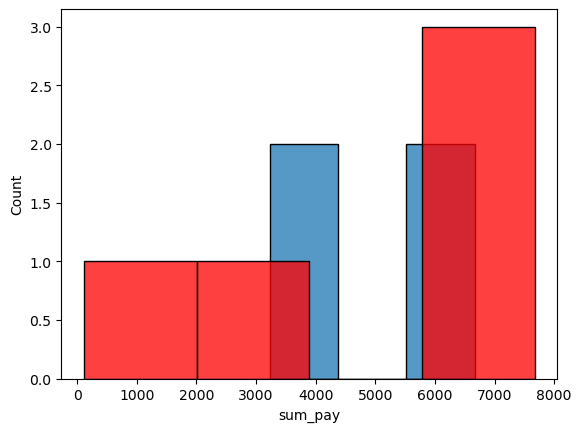

Не достаточно данных!


In [258]:
for i in un:
    test = df.loc[(df.id_group == 'test') & (df.id_point == i)]
    test = test['sum_pay']
    control = df.loc[(df.id_group == 'control') & (df.id_point == i)]
    control = control['sum_pay']
    print(i)
    show_hist (test, control)
    if len(test)>100 and len(control)>100:
        mann_whitney_func (test, control)
        test_calc (test, control)
    else:
        print('Не достаточно данных!')
        

In [ ]:
### Вывод, в точке 1199 нет контрольных наблюдений для анализа, в точке 1186 и 1188 не достаточно наблюдений, для проведения анализа.

In [ ]:
### Часть 3 Сегментация по длительности регистрации

In [270]:
import numpy as np
from numpy import *
from scipy.stats import pearsonr
from scipy.stats import spearmanr



def proxi_ranges (set1, set2, a=0.05):
    disp1 = np.var(set1)
    disp2 = np.var(set2)
    covariance = np.cov(set1, set2)
    print(f'''Дисперсия первого ряда: {disp1}, Дисперсия второго ряда: {disp2}. Коэффициент ковариляции данных: {covariance}.''')
    kPirs,pPirs=pearsonr(set1, set2)
    kSpir,pSpir=spearmanr(set1, set2)
    if pPirs>a:
        print('Корреляция Пирсона для данных равна нулю.')
    elif abs(kPirs) < 0.3:
        print(f'Коэффициент корреляции Пирсона - {kPirs}. Корреляция слабая ')
    elif abs(kPirs) > 0.7:
        print(f'Коэффициент корреляции Пирсона - {kPirs}. Корреляция сильная ')
    else: print(f'Коэффициент корреляции Пирсона - {kPirs}. Корреляция средняя')
    
    if pSpir>a:
        print('Корреляция Спирмена для данных ровна нулю.')
    elif abs(kSpir) < 0.3:
        print(f'Коэффициент корреляции Спирмена - {kSpir}. Корреляция слабая ')
    elif abs(kSpir) > 0.7:
        print(f'Коэффициент корреляции Спирмена - {kSpir}. Корреляция сильная ')
    else: print(f'Коэффициент корреляции Спирмена - {kSpir}. Корреляция средняя')
    
proxi_ranges (df['sum_pay'], df['months_reg'])

Дисперсия первого ряда: 6023336.11113493, Дисперсия второго ряда: 10.038649533445552. Коэффициент ковариляции данных: [[6.02389590e+06 4.65262789e+03]
 [4.65262789e+03 1.00395825e+01]].
Коэффициент корреляции Пирсона - 0.5982762521330374. Корреляция средняя
Коэффициент корреляции Спирмена - 0.6520008575703581. Корреляция средняя


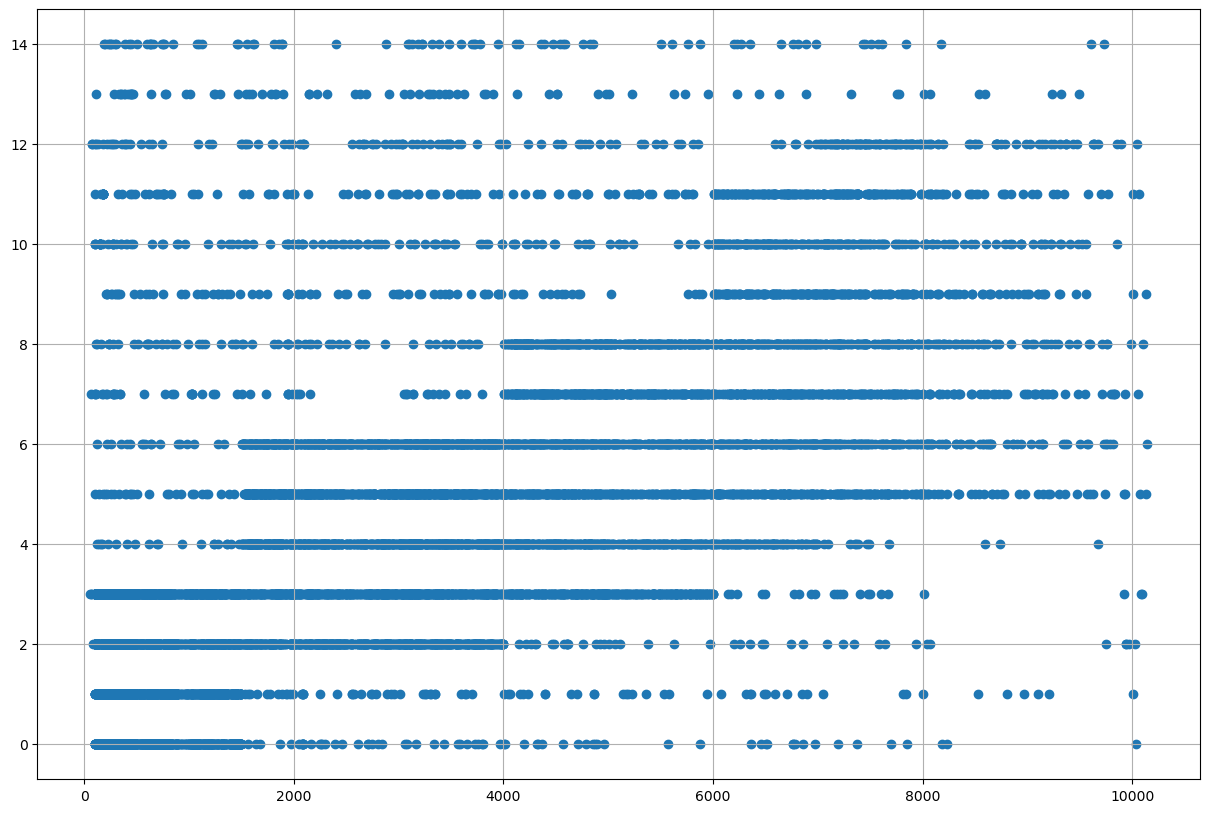

In [276]:
plt.figure(figsize=(15,10))
plt.scatter(df['sum_pay'], df['months_reg'])
plt.grid()
plt.show()

In [ ]:
### На графике мы видим, что корреляция средняя, если провести прямую по диагонали, то возле нее будет наибольшее скопление точек. 
### Можно сделать вывод, что на сумму покупки влияет, как давно они зарегистрированны на платформе. Чем "Старше" пользователь, тем больше сумма покупок.